<a href="https://colab.research.google.com/github/MartinPSE/PyTorch_Basic/blob/main/TensorManuplation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서조작하기
---
  2D Tensor <br>
  batch size * dimension <br>
  ( 행의 크기 * 열의 크기 )

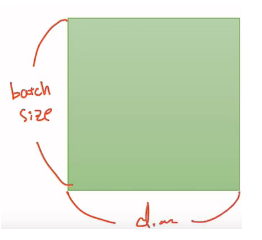

  3D Tensor ( Vision ) <br>
  batch size, width ,height <br>
  ---
  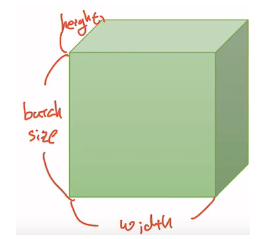

  3D Tensor ( NLP )<br>
  batch size, length, dim 
  ---
  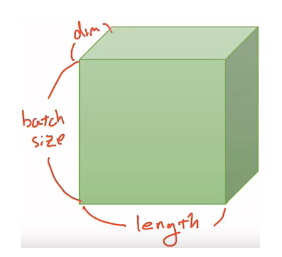


In [1]:
import torch

m1 = torch.FloatTensor([[1,2],[3,4]])
m2 = torch.FloatTensor([[1],[2]])
m1, m2

(tensor([[1., 2.],
         [3., 4.]]), tensor([[1.],
         [2.]]))

In [3]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)


tensor([[1., 2.],
        [3., 4.]])


In [5]:
print(t.max(dim=0))

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [6]:
print(t.max(dim=1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


### 뷰 (View) - 원소의 수를 유지하면서 텐서의 크기 변경. 매우 중요

In [10]:
import numpy as np

t = np.array([[[0,1,2],
                [3,4,5]],
               [[6,7,8],
                [9,10,11]]])

In [12]:
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


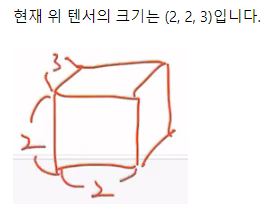

#### 4-1) 3차원 텐서에서 2차원 텐서로 변경
---
  view 를 사용하여 

In [13]:
print(ft.view([-1, 3])) # ft 라는 텐서를 ( ?, 3 ) 의 크기로 변경
print(ft.view([-1,3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


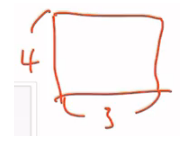

view([-1,3])의 의미는, -1은 첫번째 차원은 내가 잘 모르니깐 Pytorch에게 맡기고, 3은 두번째 차원의 기리는 3을 가지도록 하라는 의미다. <br>
현재 3차원 텐서를 2차원 텐서로 변경하되 (?,3)의 크기로 변경,
결과적으로 2 x 2 x 3 --> ( 4, 3 ) 로 변경

#### 4-2 ) 3차원 텐서의 크기 변경
---
  차원은 유지하되, 크기(shape)를 바꾸는 작업 <br>
  2 x 2 x 3 -> ( ? x 1 x 3 ) 3 으로 바꾸려면? 

In [14]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### 5) 스퀴즈 ( Squeeze ) --> 1인 차원을 제거한다.
---
  차원이 1인 경우에 해당 차원을 제거 <br>
  (3,1) --> 3


In [15]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft, ft.shape)

tensor([[0.],
        [1.],
        [2.]]) torch.Size([3, 1])


In [16]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### 6) 언스퀴즈(Insqueeze) --> 특정 위치에 1인 차원을 추가한다.
---
  스퀴즈의 정반대. 

In [17]:
ft = torch.FloatTensor([0,1,2])
print(ft, ft.shape)

# 3, --> (1,3)

tensor([0., 1., 2.]) torch.Size([3])


In [22]:
# 첫 번째 차원의 인덱스를 의미하는 숫자 0을 인자로 넣으면 첫번째 차원에 1인 차원을 추가
print(ft.unsqueeze(0), ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]]) torch.Size([1, 3])


In [23]:
# unsqueeze(0) 과 동일하다.
print(ft.view(1,-1))
print(ft.view(1,-1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [25]:
# 1번 인덱스에 1차원 추가  (3, --> (3,1)
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [26]:
# unsqueeze(1) 과 동일
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


### 7) 타입 캐스팅 (Type Casting)
---
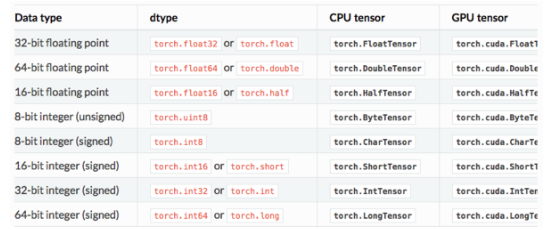

In [27]:
lt = torch.LongTensor([1,2,3,4])
print(lt)

tensor([1, 2, 3, 4])


In [28]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [29]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [30]:
print(bt.long(), bt.float())

tensor([1, 0, 0, 1]) tensor([1., 0., 0., 1.])


## 8) 연결하기 (concatenate)
---
  두 텐서를 연결하는 방법

In [32]:
x = torch.FloatTensor([[1,2],[3,4]])
y = torch.FloatTensor([[5,6],[7,8]])

In [37]:
print(torch.cat([x,y], dim=0), torch.cat([x,y], dim=0).shape)


tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]]) torch.Size([4, 2])


In [38]:
print(torch.cat([x,y], dim=1), torch.cat([x,y], dim=1).shape)


tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]]) torch.Size([2, 4])


### 9) 스택킹(Stacking)
---
  스택킹이 더 편리할 때가 있다.

In [39]:
x = torch.FloatTensor([1,2])
y = torch.FloatTensor([3,4])
z = torch.FloatTensor([5,6])

In [41]:
print(torch.stack([x,y,z]),torch.stack([x,y,z]).shape)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]]) torch.Size([3, 2])


In [42]:
print(torch.stack([x,y,z], dim=1),torch.stack([x,y,z], dim=1).shape)

tensor([[1., 3., 5.],
        [2., 4., 6.]]) torch.Size([2, 3])


### 10) ones_like 와 zeros_like - 1로 채워진 텐서와 0으로 채워진 텐서

In [43]:
x = torch.FloatTensor([[0,1,2],[2,1,0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [44]:
print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [45]:
print(torch.zeros_like(x))

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 11) In-place Operation ( 덮어쓰기 연산 )
---

In [47]:
x = torch.FloatTensor([[1,2],[3,4]])

print(x.mul(2))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [48]:
x = torch.FloatTensor([[1,2],[3,4]])

# _ 를 추가하면 덮어쓰게 된다.
print(x.mul_(2))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
